# Assignment A7 1

**Description**  
This assignment is to let you summarise the machine learning algorithms you have learned so far and to implement your knowledge in solving real-life security problem.  
You can use the provided links or other sources to get access to large data sets related to data security issues.

Choose a data set and the appropriate algorithms for solving a task in the context of the data.

Design and develop iPython solution, and either upload the notebook or a link to it.



## Dataset Information

We chose the Creditcard Fraud dataset from Kaggle, which is linked below.  
[Dataset reference](https://www.kaggle.com/mlg-ulb/creditcardfraud)

This Dataset is a collection of transactions including fraud transactions.  
Our assignment is to create a model that can distinguish between fraud and not fraud.
Because we the dataset contains labels we can use Supervised Learning Models.

## Why Classification?
**Differents between Discrete and Continuous**  
Classification predicts and class, like gender, color and object.  
It is based on discrete values, meaning the values are finite and countable.  

Regression predicts a value, like size, income and time.  
It is based on continuous values, meaning the values can be infite and not countable.  
The digits in π are continuous, this is because π contains are infite amount of digits.  

Therefore we have chosen classification to predict one of the two types of transactions in the dataset. 

## Chosen Classifiers
* Decision Tree
* Random Forest
* Naive Bayes

## Imports

In [66]:
import numpy as np
import pandas as pd

# classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# utilities
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix´

# plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from zipfile import ZipFile

## Unzipping Zip File

In [67]:
zip_path = 'creditcardfraud.zip'
with ZipFile(zip_path, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

## Data Preparation

### Loading the cvs file into DataFrame

In [68]:
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

### Display Dataset Section

In [69]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Check Dataset for Null Values

In [70]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Display Dataset Informations

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Calculate Descriptive Statistics for the Dataset

In [72]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Display Confusion Matrix

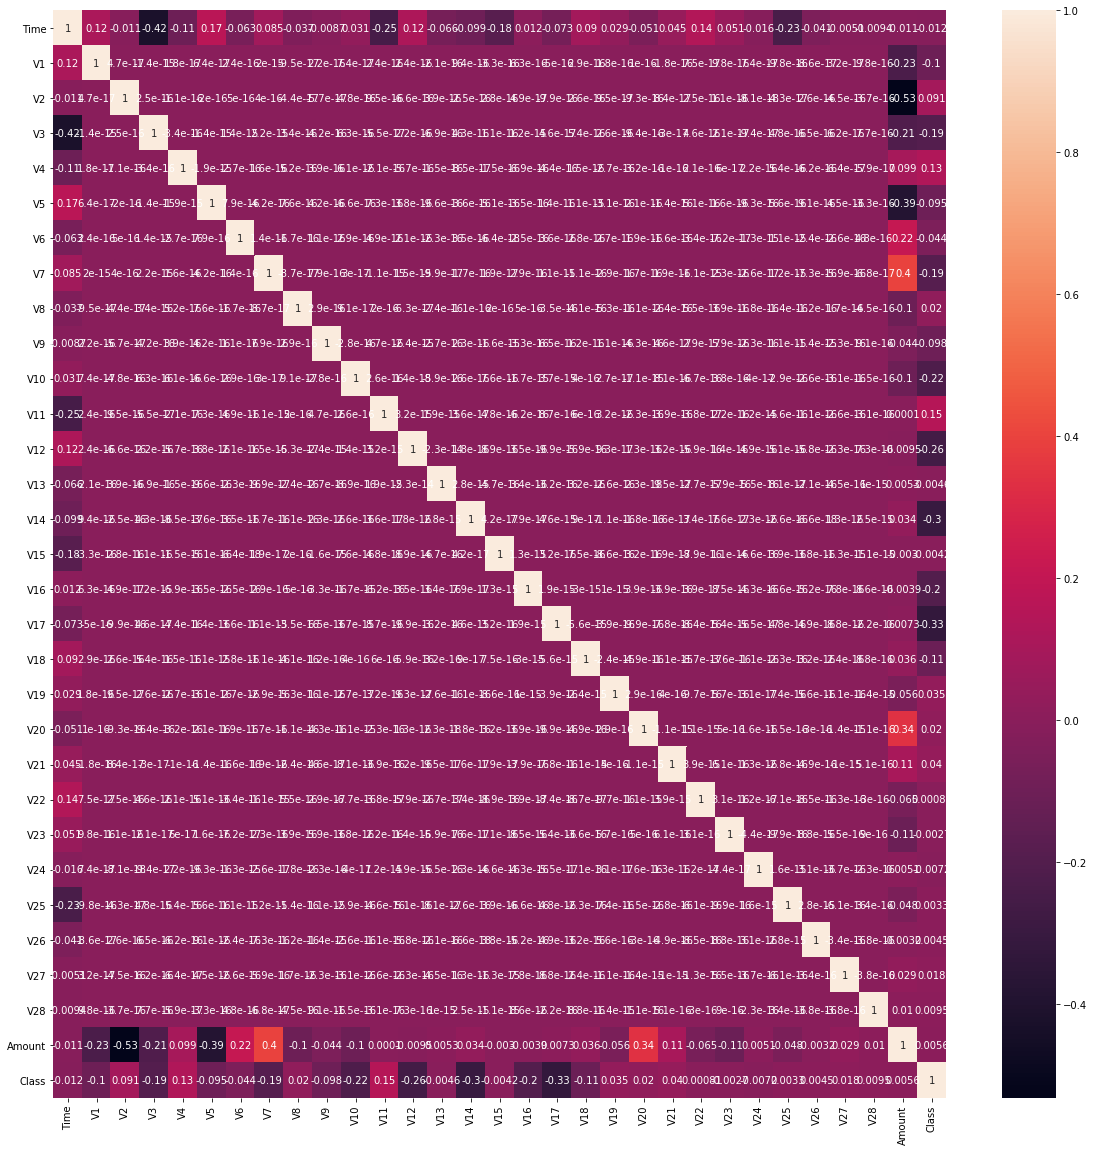

In [73]:
corr_matrix = df.corr()
corr_matrix

# plot the matrix as a heat map
plt.subplots(figsize = (20, 20))
sns.heatmap(corr_matrix, annot=True)

### Splitting Test and Train Data

In [74]:
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)

targets = list(df)

X_train = train_data[targets[:-1]]
y_train = train_data[targets[-1]]

X_test = test_data[targets[:-1]]
y_test = test_data[targets[-1]]

### Separating 'Fraud' and 'Not Fraud' into DataFrames

In [75]:
not_frauds = df.loc[df['Class'] == 0]
frauds = df.loc[df['Class'] == 1]

not_frauds = not_frauds.drop(['Class'], axis=1)
frauds = frauds.drop(['Class'], axis=1)

## Decision Tree Classifier

### Initialize Classification Model

In [76]:
decisionTreeClassifier = DecisionTreeClassifier(max_depth=5)

### Train Model for Classification

In [77]:
decisionTreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Validate Model Accuracy

In [78]:
dtc_score = decisionTreeClassifier.score(X_test, y_test)
dtc_score

0.9994382219725431

### Show Model Rapport

In [79]:
print(classification_report(y_train, decisionTreeClassifier.predict(X_train), target_names=['not fraud', 'fraud']))

precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    227453
       fraud       0.96      0.83      0.89       392

    accuracy                           1.00    227845
   macro avg       0.98      0.92      0.94    227845
weighted avg       1.00      1.00      1.00    227845



### Perform Predictions

In [80]:
dtc_predict_fraud = decisionTreeClassifier.predict([frauds.iloc[0]])
dtc_predict_not_fraud = decisionTreeClassifier.predict([not_frauds.iloc[0]])

print('predict fraud, should be [1] =>', dtc_predict_fraud)
print('predict not fraud, should be [0] =>', dtc_predict_not_fraud)

predict fraud, should be [1] => [1]
predict not fraud, should be [0] => [0]


## Random Forest Classifier

### Initialize Classification Model

In [81]:
randomForestClassifier = RandomForestClassifier(n_estimators = 20, max_depth = 5)

### Train Model for Classification

In [82]:
randomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Validate Model Accuracy

In [83]:
rfc_score = randomForestClassifier.score(X_test, y_test)
rfc_score

0.9993679997191109

### Show Model Rapport

In [84]:
print(classification_report(y_train, randomForestClassifier.predict(X_train), target_names=['not fraud', 'fraud']))

precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    227453
       fraud       0.97      0.78      0.86       392

    accuracy                           1.00    227845
   macro avg       0.98      0.89      0.93    227845
weighted avg       1.00      1.00      1.00    227845



### Perform Predictions

In [85]:
predict_fraud = randomForestClassifier.predict([frauds.iloc[5]])
predict_not_fraud = randomForestClassifier.predict([not_frauds.iloc[0]])

print('predict fraud, should be [1] =>', predict_fraud)
print('predict not fraud, should be [0] =>', predict_not_fraud)

predict fraud, should be [1] => [1]
predict not fraud, should be [0] => [0]


## Naïve Bayes Classifier

### Initialize Classification Model

In [86]:
naiveBayesClassifier = GaussianNB()

### Train Model for Classification

In [87]:
naiveBayesClassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Validate Model Accuracy

In [88]:
nbc_score = naiveBayesClassifier.score(X_test, y_test)
nbc_score

0.9919946631087392

### Show Model Rapport

In [89]:
print(classification_report(y_train, naiveBayesClassifier.predict(X_train), target_names=['not fraud', 'fraud']))

precision    recall  f1-score   support

   not fraud       1.00      0.99      1.00    227453
       fraud       0.14      0.67      0.24       392

    accuracy                           0.99    227845
   macro avg       0.57      0.83      0.62    227845
weighted avg       1.00      0.99      0.99    227845



### Perform Predictions

In [90]:
predict_fraud = naiveBayesClassifier.predict([frauds.iloc[3]])
predict_not_fraud = naiveBayesClassifier.predict([not_frauds.iloc[0]])

print('predict fraud, should be [1] =>', predict_fraud)
print('predict not fraud, should be [0] =>', predict_not_fraud)

predict fraud, should be [1] => [1]
predict not fraud, should be [0] => [0]


## Compare Model Scores

In [92]:
scores = {dtc_score: 'Decision Tree Classifier', rfc_score:'Random Forest Classifier',  nbc_score:'Naive Bayes Classifier'}

print("scores for decision tree classifier", dtc_score)
print("scores for random forest classifier", rfc_score)
print("scores for naive bayes classifier", nbc_score)

print("best score is", scores[max(scores)])

scores for decision tree classifier 0.9994382219725431
scores for random forest classifier 0.9993679997191109
scores for naive bayes classifier 0.9919946631087392
best score is Decision Tree Classifier


### Based on the results, we can conclude the Decision Tree Classifier is the most accurate classifier for this dataset.